Classification Report:

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        42
           B       0.14      0.05      0.08        76
           C       0.40      0.80      0.53       158
           D       0.23      0.11      0.15        92
           E       0.00      0.00      0.00        32

    accuracy                           0.35       400
   macro avg       0.15      0.19      0.15       400
weighted avg       0.24      0.35      0.26       400

Confusion Matrix:

[[  0   1  34   7   0]
 [  1   4  63   7   1]
 [  2  11 127  18   0]
 [  3   7  72  10   0]
 [  2   5  23   2   0]]


<Figure size 800x600 with 0 Axes>

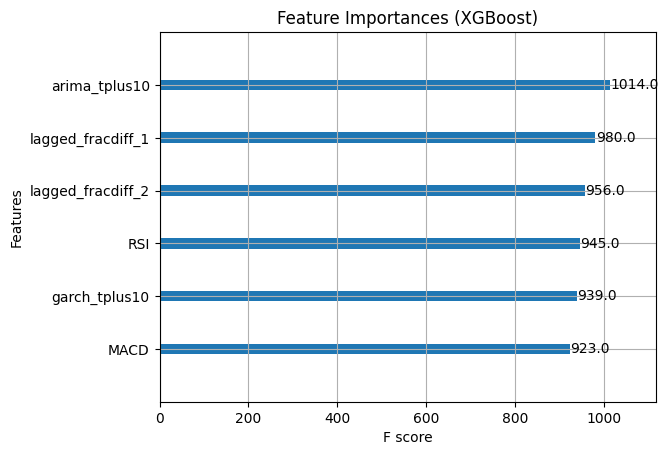

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# ==================== 2. GENERATE EXAMPLE DATA ====================
n_samples = 2000

# Create DataFrame with random data for demonstration
df = pd.DataFrame({
    'RSI': np.random.uniform(0, 100, n_samples),
    'MACD': np.random.normal(0, 1, n_samples),
    'lagged_fracdiff_1': np.random.normal(0, 1, n_samples),
    'lagged_fracdiff_2': np.random.normal(0, 1, n_samples),
    'arima_tplus10': np.random.normal(0, 1, n_samples),
    'garch_tplus10': np.random.uniform(0, 2, n_samples),
})

# Create random classes A-E (dummy target). In reality, you'd derive these from your time-series logic.
possible_classes = ['A', 'B', 'C', 'D', 'E']
df['target_class'] = np.random.choice(possible_classes, size=n_samples, 
                                      p=[0.1, 0.2, 0.4, 0.2, 0.1])

# ==================== 3. FEATURE & TARGET DEFINITION ====================
feature_cols = [
    'RSI',
    'MACD',
    'lagged_fracdiff_1',
    'lagged_fracdiff_2',
    'arima_tplus10',
    'garch_tplus10'
]
X = df[feature_cols]
y = df['target_class']

# ==================== 4. LABEL-ENCODE THE TARGET ====================
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# This maps your classes A,B,C,D,E to numeric 0,1,2,3,4

# ==================== 5. MIN-MAX SCALING (OPTIONAL) ====================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to keep column names (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

# ==================== 6. TRAIN/TEST SPLIT ====================
# For a real time-series project, consider using a chronological split or walk-forward validation.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, 
    y_encoded, 
    test_size=0.2, 
    shuffle=False,
    random_state=42
)

# ==================== 7. XGBOOST MODEL (CLASSIFICATION) ====================
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# ==================== 8. PREDICTIONS & EVALUATION ====================
y_pred_numeric = model.predict(X_test)
# Convert numeric predictions back to original labels (A,B,C,D,E)
y_pred = label_encoder.inverse_transform(y_pred_numeric)
y_test_labels = label_encoder.inverse_transform(y_test)

print("Classification Report:\n")
print(classification_report(y_test_labels, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test_labels, y_pred))

# ==================== 9. PLOT FEATURE IMPORTANCE ====================
plt.figure(figsize=(8, 6))
plot_importance(model, max_num_features=len(feature_cols))
plt.title("Feature Importances (XGBoost)")
plt.show()


# Feature importance

In [ ]:
# https://github.com/ki33elev/Adv_Fin_ML/blob/main/Chapter%208.%20Feature%20Importance.ipynb